C:\Users\admin\AppData\Local\Temp\ipykernel_10232\728619362.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wrapped_labels, y=top_products.values, palette="Blues_r")


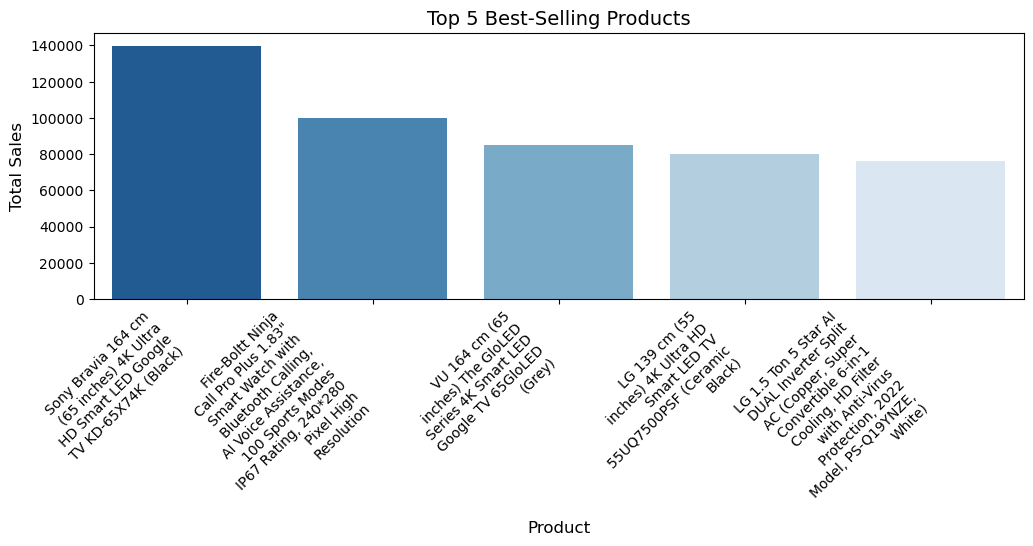

✅ PDF Report Generated: Sales_Report.pdf


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF
import textwrap

# Step 1: Load Data from CSV
file_path = "cleaned_amazon1.csv"  # Replace with your file path
df = pd.read_csv(file_path)

# Step 2: Data Analysis
summary = df.describe()  # Get statistical summary
top_products = df.groupby("product_name")["actual_price"].sum().sort_values(ascending=False).head(5)  # Top 5 products

# Wrap or Truncate Product Names
def wrap_labels(labels, width=20):
    return ["\n".join(textwrap.wrap(label, width)) for label in labels]

wrapped_labels = wrap_labels(top_products.index)

# Data Visualization
plt.figure(figsize=(12, 7))
sns.barplot(x=wrapped_labels, y=top_products.values, palette="Blues_r")

plt.xlabel("Product", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.title("Top 5 Best-Selling Products", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)  # Rotate & align properly

plt.subplots_adjust(bottom=0.5)  # Increase bottom margin to prevent cut-off
plt.savefig("sales_chart_fixed.png", bbox_inches="tight")
plt.show()

# Step 4: Generate PDF Report
class PDF(FPDF):
    def header(self):
        self.set_font("Arial", "B", 16)
        self.cell(200, 10, "Sales Report", ln=True, align="C")
        self.ln(10)

pdf = PDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()
pdf.set_font("Arial", size=12)

# Add Summary Table
pdf.cell(200, 10, "Sales Summary Statistics", ln=True, align="C")
pdf.ln(10)

# Add table header
col_width = 40  # Adjusted column width
pdf.set_font("Arial", "B", 10)
for column in summary.columns:
    pdf.cell(col_width, 10, column, 1)
pdf.ln()

# Add table rows
pdf.set_font("Arial", size=10)
for index, row in summary.iterrows():
    for column in summary.columns:
        pdf.cell(col_width, 10, f"{row[column]:.2f}", 1)
    pdf.ln()

pdf.ln(10)

# Add Top Products Section
pdf.set_font("Arial", "B", 12)
pdf.cell(200, 10, "Top 5 Best-Selling Products", ln=True, align="C")
pdf.ln(10)

pdf.set_font("Arial", size=10)
for product, sales in top_products.items():
    pdf.cell(0, 10, f"{product}: ${sales:.2f}", ln=True)

pdf.ln(10)

# Add Visualization
pdf.set_font("Arial", "B", 12)
pdf.cell(200, 10, "Sales Chart", ln=True, align="C")
pdf.ln(10)
pdf.image("sales_chart_fixed.png", x=30, w=150)

# Save Report
pdf.output("Sales_Report1.pdf")

print("✅ PDF Report Generated: Sales_Report.pdf")
